# Projet Machine Learning : Prédiction du Succès des Campagnes de Télémarketing Bancaire

**Auteur:** Lyes SID ALI  -  Cédric LES BIENS  -  Nour MAALI  
**Dataset:** Bank Marketing Dataset  
**Enseignant:** Dario COLAZZO  

## Plan
1. Description du problème
2. Import et chargement
3. Exploration et Analyse des Données
4. Preprocessing et Feature Engineering
5. Modélisation
6. Évaluation et Comparaison des Modèles
7. Validation Finale
8. Conclusions et Perspectives

## 1. Description du problème
### 1.1 Contexte
Une institution bancaire portugaise a mené des campagnes de marketing direct basées sur des appels téléphoniques pour promouvoir des dépôts à terme. Ces campagnes ont nécessité de multiples contacts avec les mêmes clients pour déterminer s'ils souscrivaient ou non au produit bancaire proposé.

### 1.2 Problème à Résoudre
Prédire si un client va souscrire à un dépôt à terme bancaire (variable **y**) en fonction de ses caractéristiques personnelles, du contexte de la campagne et des indicateurs socio-économiques.

### 1.3 Type de Problème
**Classification Binaire**
- Il s'agit d'un problème de classification car la variable cible est catégorielle binaire (yes/no). Ce n'est pas une régression, car nous ne prédisons pas une valeur numérique continue.
- **Objectif :** Classifier chaque client en deux catégories : 
  - Classe positive (1) : le client souscrit au dépôt à terme (**y = yes**)
  - Classe négative (0) : le client ne souscrit pas au dépot à terme (**y = no**)

### 1.4 Variables et Features

**Variable Cible (la target) :**
- **y** : Le client a-t-il souscrit à un dépôt à terme ? yes/no

**Features (20 variables d'entrée) :**

**A. Données du client bancaire (7 features)**
- `age` : Age
- `job` : Type d'emploi 
- `marital` : Statut matrimonial 
- `education` : Niveau d'éducation 
- `default` : Crédit en défaut  
- `housing` : Prêt immobilier 
- `loan` : Prêt personnel 

**B. Données du dernier contact de la campagne (4 features)**
- `contact` : Type de communication
- `month` : Mois du dernier contact 
- `day_of_week` : Jour de la semaine 
- `duration` : Durée du dernier contact en secondes 

**C. Autres attributs de la campagne (4 features)**
- `campaign` : Nombre de contacts durant cette campagne 
- `pdays` : Jours depuis le dernier contact d'une campagne précédente
- `previous` : Nombre de contacts avant cette campagne 
- `poutcome` : Résultat de la campagne précédente 

**D. Données socio-économiques (5 features)**
- `emp.var.rate` : Taux de variation de l'emploi 
- `cons.price.idx` : Indice des prix à la consommation
- `cons.conf.idx` : Indice de confiance des consommateurs
- `euribor3m` : Taux Euribor à 3 mois 
- `nr.employed` : Nombre d'employés 

### 1.5 Algorithmes à Utiliser

Nous allons implémenter et comparer 5 algorithmes différents :

1. **Régression Logistique:**  Modèle de classification linéaire simple
2. **Decision Tree :**  Algorithme basé sur des règles de décision
3. **Naive Bayes:**  Classification utilisant les probabilités basée sur le théorème de Bayes
4. **Perceptron:**  Algorithme de classification linéaire
5. **K-Nearest Neighbors (KNN):**  Classification basée sur la similarité avec les k voisins les plus proches

### 1.6 Métriques d'Évaluation

Étant donné qu'il s'agit d'un problème de classification binaire potentiellement déséquilibré, nous utiliserons les métriques vues en cours :

- **Accuracy** : Taux de bonnes prédictions global 
- **Precision** : Proportion de vrais positifs parmi les prédictions positives 
- **Recall** : Proportion de vrais positifs parmi tous les positifs réels  
- **F1-Score** : Moyenne de Precision et Recall 
- **Matrice de Confusion** : Visualisation des vrais/faux positifs/négatifs
- **Courbe ROC** : Pour visualiser le compromis sensibilité/spécificité

### 1.7 Stratégie de Validation (Model Selection)

- **Train-Test Split** : 80% entraînement, 20% test
- **Validation Croisée K-flod** : 5-fold cross-validation pour évaluer la robustesse

## 2. Import et Chargement

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold


import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Imports OK")

Imports OK


In [79]:
# Chargement du dataset
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
print(f"Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dataset chargé : 41188 lignes, 21 colonnes


## 3. Exploration des Données

In [80]:
# Apercu données
print("Apercu des 10 premières lignes de données")
df.head(10)

Apercu des 10 premières lignes de données


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
# Infos générales
print("Infos dataset :")
print(df.info())
print("\nStats :")
df.describe()

Infos dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx  

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [82]:
# Valeurs manquantes
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Pas de valeurs manquantes")
else:
    print(missing[missing > 0])

Pas de valeurs manquantes


Distribution :
y
no     36548
yes     4640
Name: count, dtype: int64

Proportions :
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


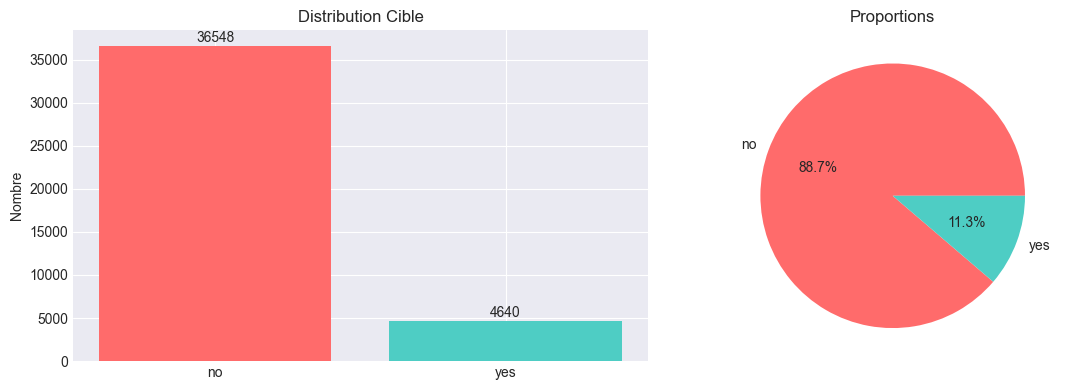


Ratio déséquilibré : 7.9 (no/yes)
Classes très déséquilibrées, il faudra en tenir compte


In [83]:
# Distribution variable cible
target_counts = df['y'].value_counts()
print("Distribution :")
print(target_counts)

print(f"\nProportions :\n{df['y'].value_counts(normalize=True)*100}") #chiffres en %
# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(target_counts.index, target_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Distribution Cible')
axes[0].set_ylabel('Nombre')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center')

axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Proportions')

plt.tight_layout()
plt.show()

ratio = target_counts['no'] / target_counts['yes']
print(f"\nRatio déséquilibré : {ratio:.1f} (no/yes)")
print("Classes très déséquilibrées, il faudra en tenir compte")

In [84]:
# Variables catégorielles
categories_col = df.select_dtypes(include=['object']).columns.tolist()
categories_col.remove('y')

print(f"Variables catégorielles : {categories_col}\n")

# Nombre de catégories
for col in categories_col:
    print(f"{col}: {df[col].nunique()} catégories")
    
# Valeurs inconnues
print("\nValeurs unkonwn :")
for col in categories_col:
    unknown = (df[col] == 'unknown').sum()
    if unknown > 0:
        print(f"{col}: {unknown} ({unknown/len(df)*100:.1f}%)")

Variables catégorielles : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories

Valeurs unkonwn :
job: 330 (0.8%)
marital: 80 (0.2%)
education: 1731 (4.2%)
default: 8597 (20.9%)
housing: 990 (2.4%)
loan: 990 (2.4%)


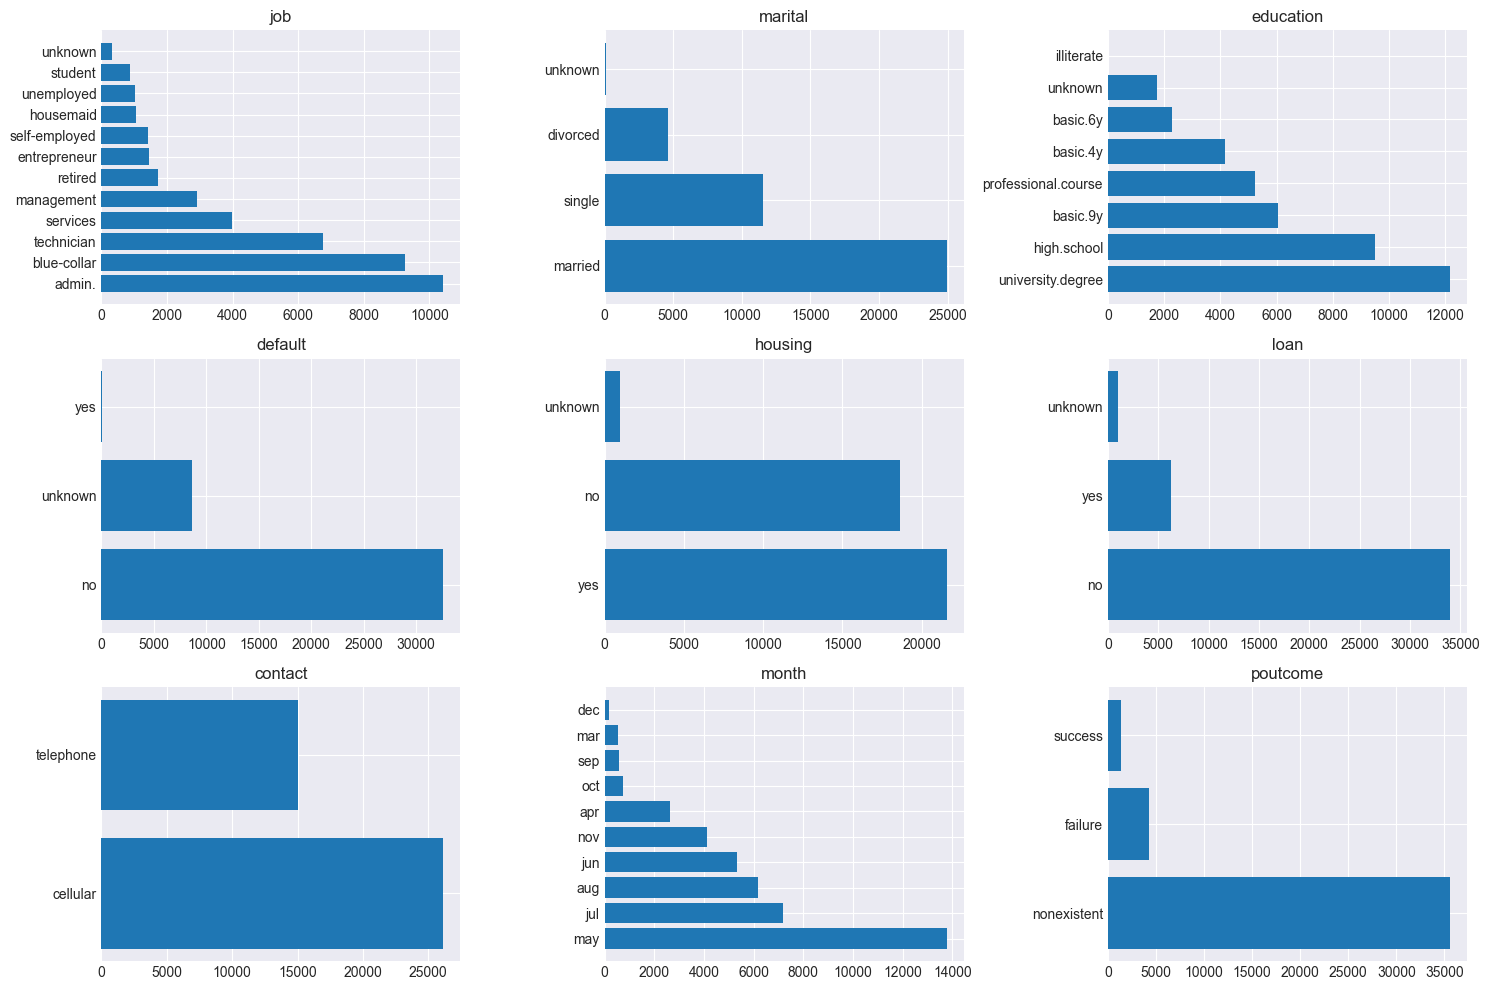

In [85]:
# Visualisation variables catégorielles
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for idx, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[idx].barh(range(len(counts)), counts.values)
    axes[idx].set_yticks(range(len(counts)))
    axes[idx].set_yticklabels(counts.index)
    axes[idx].set_title(col)
    
plt.tight_layout()
plt.show()

In [86]:
# variables numeriques
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numériques : {num_columns}\n")
df[num_columns].describe().T

Variables numériques : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


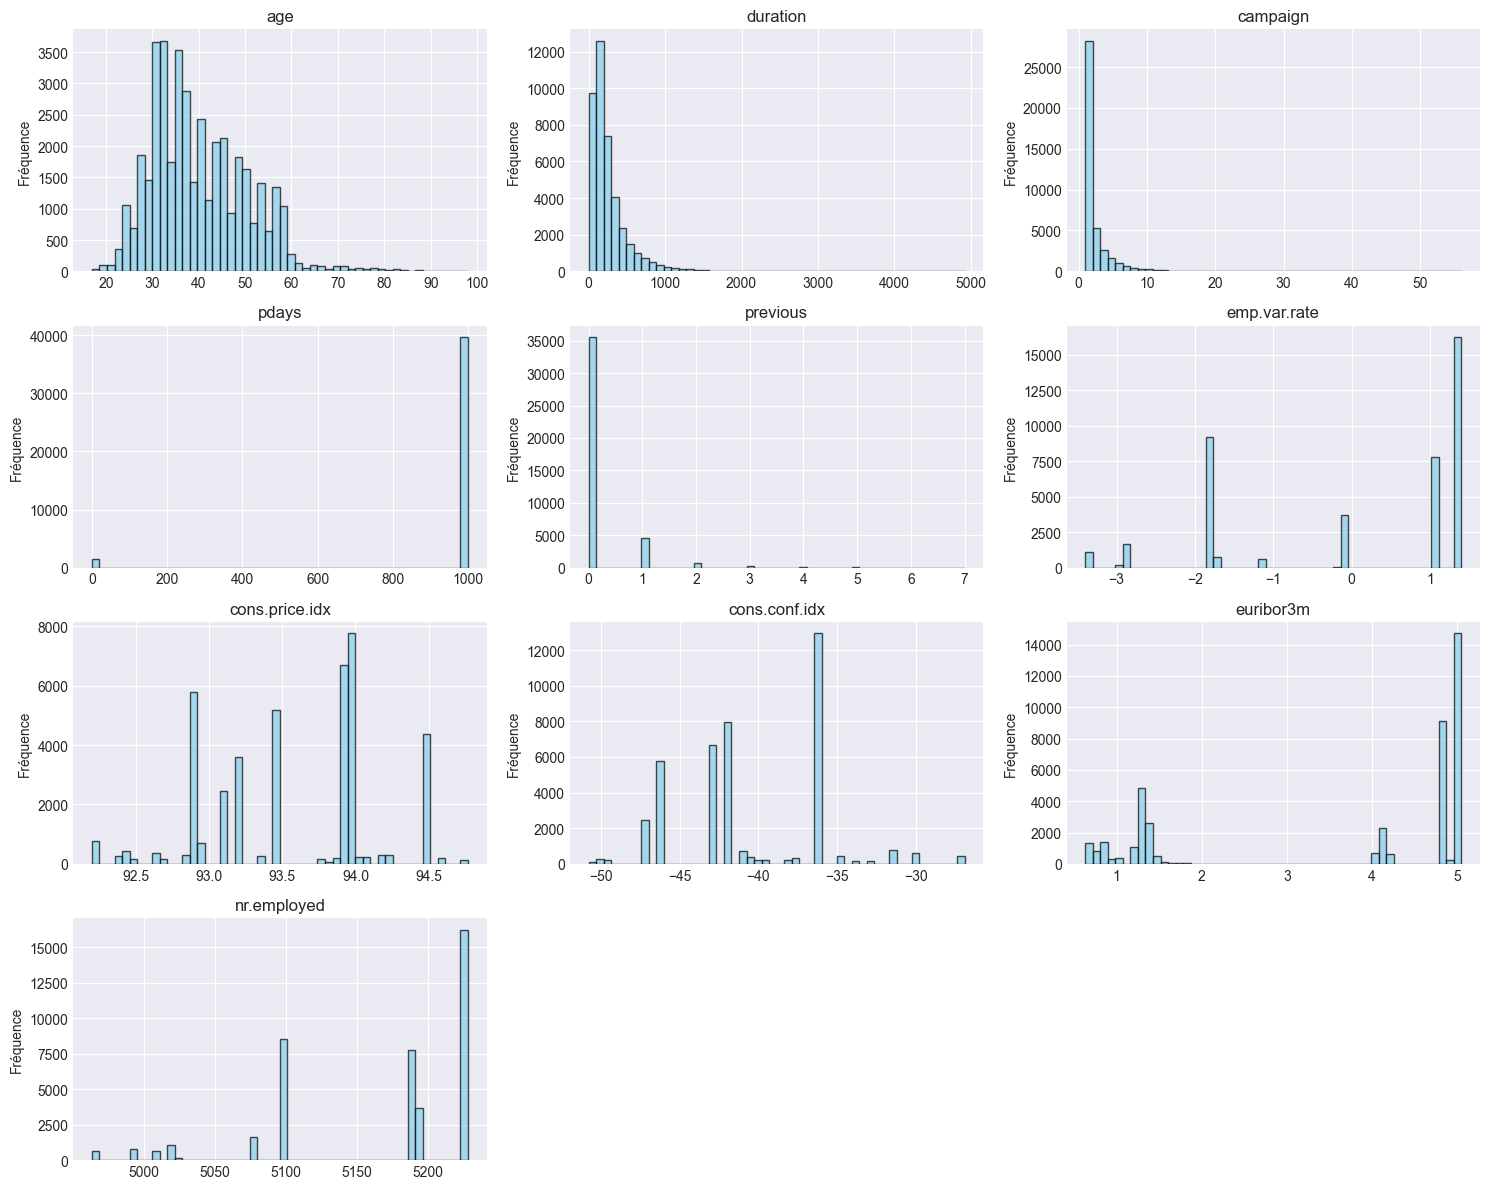

In [87]:
# Distribution variables numériques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_columns):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Fréquence')
    
for idx in range(len(num_columns), len(axes)):
    fig.delaxes(axes[idx]) #supp axes en trop

plt.tight_layout()
plt.show()

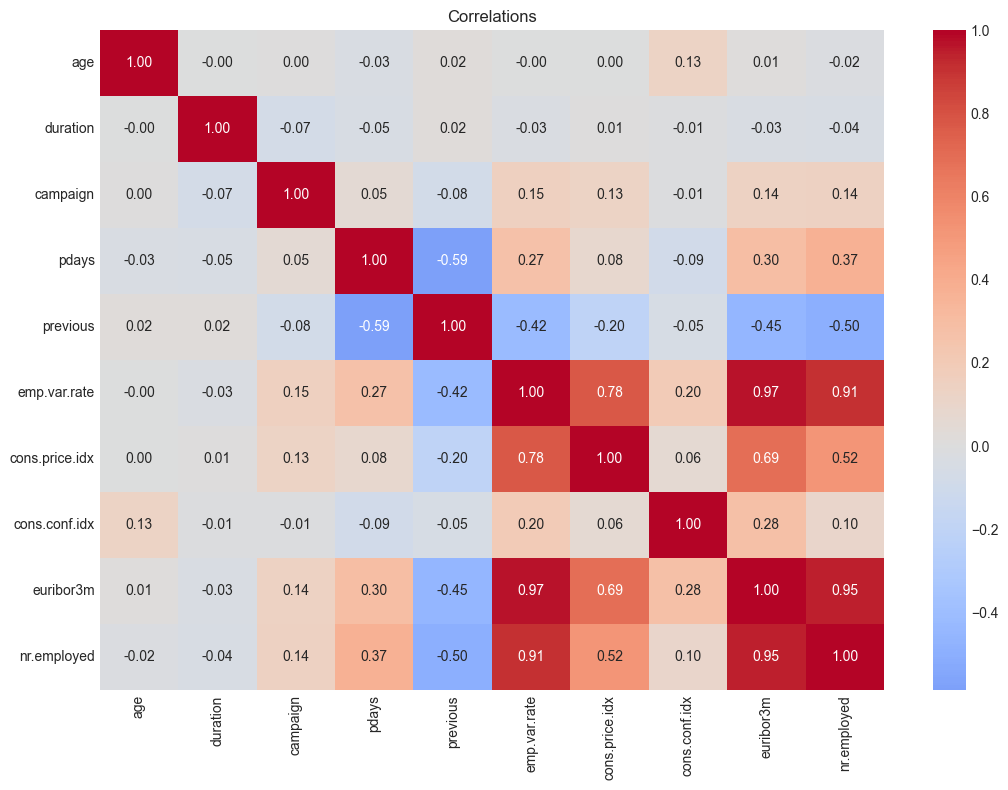

Correlations fortes (>0.7) :
emp.var.rate <-> cons.price.idx: 0.78
emp.var.rate <-> euribor3m: 0.97
emp.var.rate <-> nr.employed: 0.91
euribor3m <-> nr.employed: 0.95


In [88]:
# Correlations
plt.figure(figsize=(11, 8))
corr = df[num_columns].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlations')
plt.tight_layout()
plt.show()

# Correlations fortes
print("Correlations fortes (>0.7) :")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7:
            print(f"{corr.columns[i]} <-> {corr.columns[j]}: {corr.iloc[i, j]:.2f}")

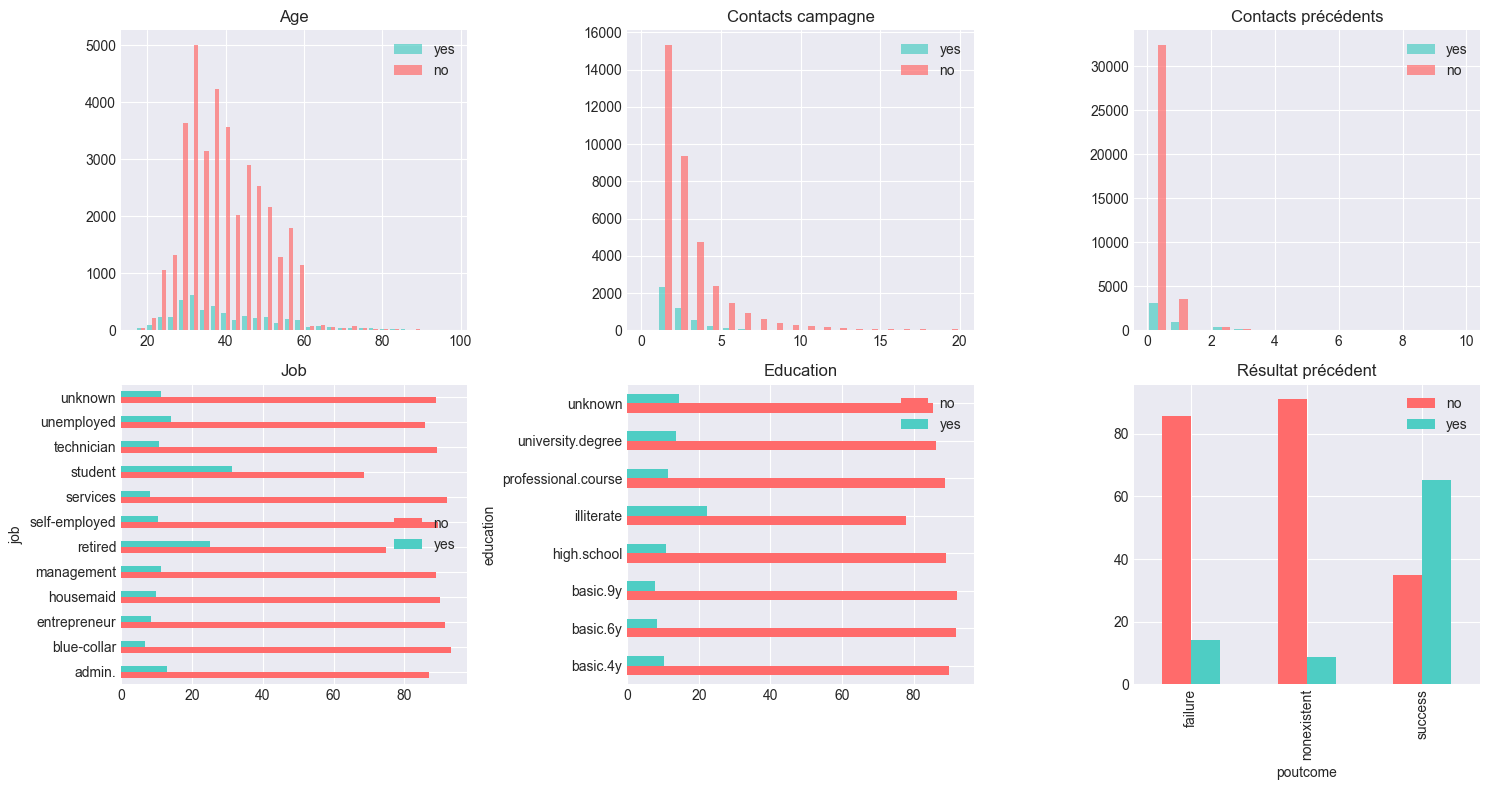

In [89]:
# Relation features / cible
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Age
axes[0, 0].hist([df[df['y']=='yes']['age'], df[df['y']=='no']['age']], bins=30, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7)
axes[0, 0].set_title('Age')
axes[0, 0].legend()

# Campaign
axes[0, 1].hist([df[df['y']=='yes']['campaign'], df[df['y']=='no']['campaign']], bins=20, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 20))
axes[0, 1].set_title('Contacts campagne')
axes[0, 1].legend()

# Previous
axes[0, 2].hist([df[df['y']=='yes']['previous'], df[df['y']=='no']['previous']], bins=15, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 10))
axes[0, 2].set_title('Contacts précédents')
axes[0, 2].legend()

#job
job_target = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_target.plot(kind='barh', ax=axes[1, 0], color=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_title('Job')
axes[1, 0].legend(['no', 'yes'])

# Education
edu_target = pd.crosstab(df['education'], df['y'], normalize='index') * 100
edu_target.plot(kind='barh', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Education')
axes[1, 1].legend(['no', 'yes'])

# Poutcome
pout_target = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
pout_target.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Résultat précédent')
axes[1, 2].legend(['no', 'yes'])

plt.tight_layout()
plt.show()

**Observations :**
- Classes très déséquilibrées (~88% no et ~11% yes)
- Certaines variables ont des "unknown"
- Corrélations fortes entre variables économiques, donc possible redondance
- La variable "duration" n'a pas un impact important car elle est connue après l'appel
- En revanche, le résultat de la campagne précédente est important

## 4. Preprocessing

In [90]:
df_processed = df.copy()

# on retire duration 
df_processed = df_processed.drop('duration', axis=1)
print("Variable duration supprimée")

df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})
print("Cible encodée (no=0, yes=1)")

# Identifier les types de variables
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('y')

print(f"\nCatégorielles: {categorical_features}")
print(f"Numériques: {numerical_features}")
print(f"\nShape final: {df_processed.shape}")

Variable duration supprimée
Cible encodée (no=0, yes=1)

Catégorielles: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numériques: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Shape final: (41188, 20)


In [91]:
# Encodage variables catégorielles
label_encoders = {}

for col in categorical_features:
    labelencoder = LabelEncoder()
    df_processed[col] = labelencoder.fit_transform(df_processed[col])
    label_encoders[col] = labelencoder
    print(f"{col}: {len(labelencoder.classes_)} catégories")

df_processed.head()

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [92]:
# Separation du dataset pour les étapes
df_final = df.drop('duration', axis=1)

# 2. Encodage de la cible (Y) - OK de garder LabelEncoder ou map ici
df_final['y'] = df_final['y'].map({'no': 0, 'yes': 1})

# 3. ONE-HOT ENCODING pour les features (La clé du succès)
# On transforme les colonnes 'object' en colonnes de 0 et 1
df_final = pd.get_dummies(df_final, drop_first=True)

X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"X: {X.shape}, y: {y.shape}")
print(f"Classe 0: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"Classe 1: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")

X: (41188, 19), y: (41188,)
Classe 0: 36548 (88.7%)
Classe 1: 4640 (11.3%)

Train: (32950, 19), Test: (8238, 19)


In [93]:
# On normalise les features numériques
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"Normalisation appliquée sur {len(numerical_features)} features")

Normalisation appliquée sur 9 features


## 5. Modélisation

On va tester 5 algorithmes et comparer leurs performances.
1. **Régression Logistique** 
2. **Decision Tree (Arbre de Décision)** 
3. **Naive Bayes** 
4. **Perceptron**
5. **K-Nearest Neighbors (KNN)**

In [94]:
# Initialisation modèles 
# lbfgs > liblinear
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs', C=0.1),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(class_weight='balanced', max_iter=1000, eta0=0.01),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [95]:
# Entrainement des modeles
import time

trained_models = {}
predictions = {}
prediction_probas = {}
training_times = {}

for name, model in models.items():
    print(f"\n{name}...")
    start = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    trained_models[name] = model
    predictions[name] = y_pred
    prediction_probas[name] = y_pred_proba
    training_times[name] = train_time
    
    print(f"Temps: {train_time:.2f}s")
    print(f"Accuracy train: {model.score(X_train_scaled, y_train):.3f}")
    print(f"Accuracy test: {accuracy_score(y_test, y_pred):.3f}")

print("\nEntraînement terminé")


Logistic Regression...
Temps: 0.05s
Accuracy train: 0.805
Accuracy test: 0.808

Decision Tree...
Temps: 0.05s
Accuracy train: 0.858
Accuracy test: 0.850

Naive Bayes...
Temps: 0.00s
Accuracy train: 0.834
Accuracy test: 0.840

Perceptron...
Temps: 0.01s
Accuracy train: 0.311
Accuracy test: 0.307

KNN...
Temps: 0.00s
Accuracy train: 0.912
Accuracy test: 0.894

Entraînement terminé


## 6. Évaluation et comparaison

In [96]:
# Calcul des métriques
results = []

for name in models.keys():
    y_pred = predictions[name]
    y_pred_proba = prediction_probas[name]
    
    results.append({
        'Modèle': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'Temps (s)': training_times[name]
    })

results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
results_df

,Modèle,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Temps (s)
1,Decision Tree,0.850085,0.392129,0.601293,0.474692,0.763253,0.050943
0,Logistic Regression,0.807963,0.326617,0.663793,0.437811,0.795778,0.047511
2,Naive Bayes,0.839767,0.354815,0.516164,0.420544,0.773138,0.002557
4,KNN,0.893664,0.557269,0.272629,0.366136,0.727104,0.001176
3,Perceptron,0.307113,0.116987,0.786638,0.203683,NaN,0.011010


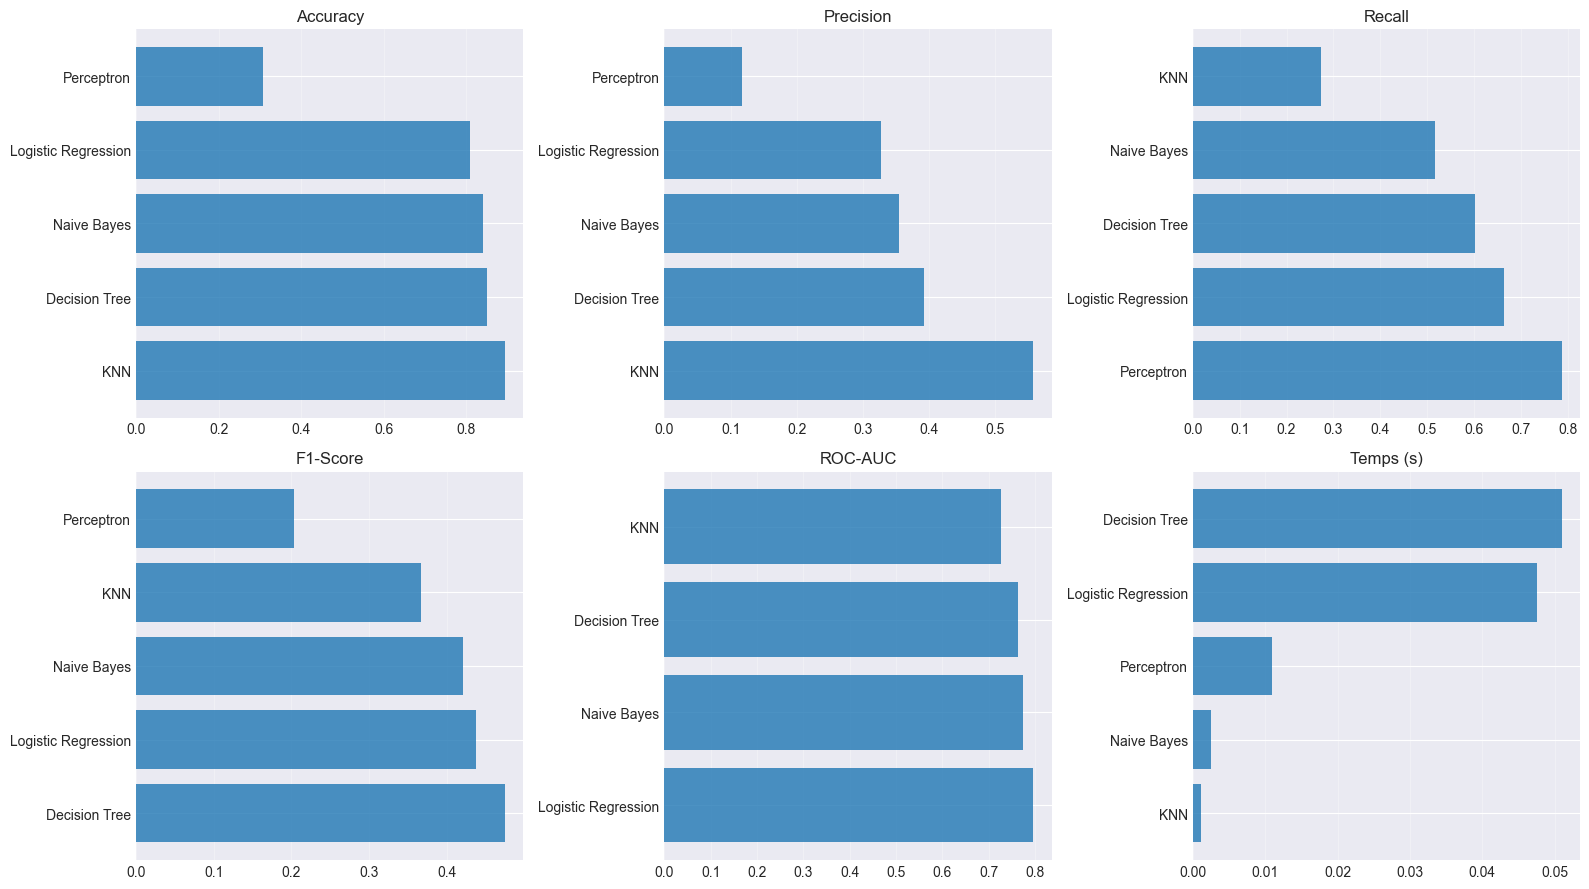

In [97]:
# visualisation des résultats
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Temps (s)']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    if metric == 'ROC-AUC':
        data = results_df[results_df[metric].notna()].sort_values(metric, ascending=False)
    else:
        data = results_df.sort_values(metric, ascending=False if metric != 'Temps (s)' else True)
    
    ax.barh(data['Modèle'], data[metric], alpha=0.8)
    ax.set_title(metric)
    ax.grid(axis='x', alpha=0.3)
    
plt.tight_layout()
plt.show()

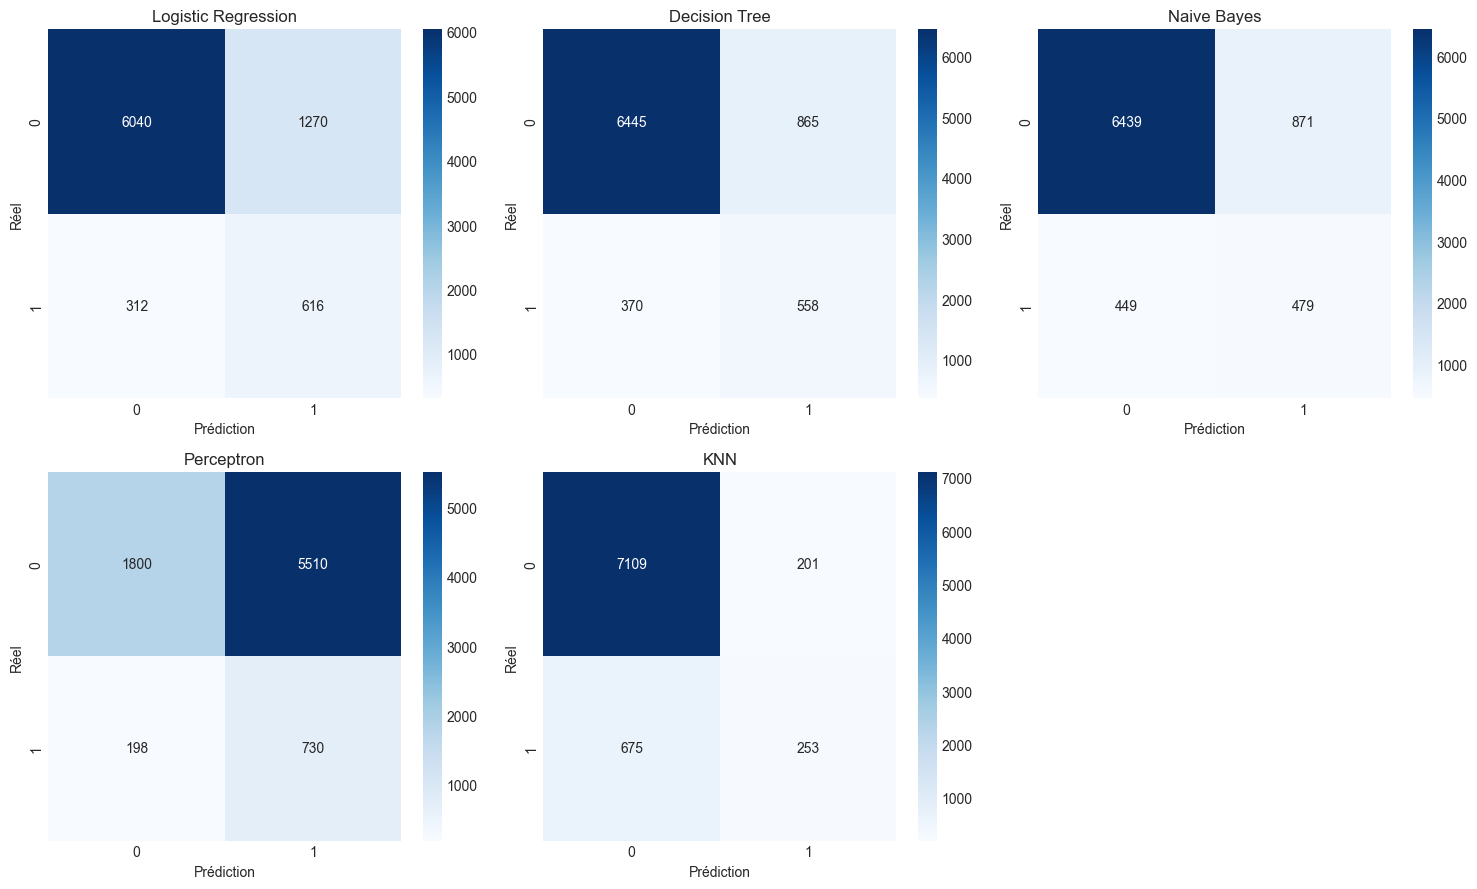

In [98]:
# Matrices de confusion TP FP TN FN
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.ravel()

for idx, name in enumerate(models.keys()):
    cm = confusion_matrix(y_test, predictions[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Prédiction')
    axes[idx].set_ylabel('Réel')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

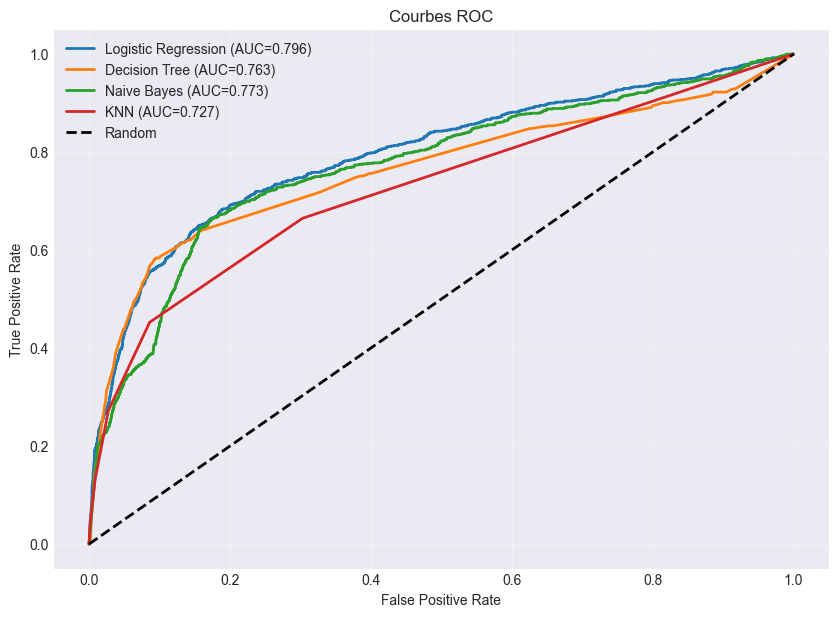

In [99]:
# Courbes ROC
plt.figure(figsize=(10, 7))

for name in models.keys():
    if prediction_probas[name] is not None:
        fpr, tpr, _ = roc_curve(y_test, prediction_probas[name])
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc(fpr, tpr):.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 7. Validation Croisée

In [100]:
# nettoyage colonnes mortes (une seule fois)
selector = VarianceThreshold(threshold=1e-8)
X_train_clean = selector.fit_transform(X_train)

# Cross-validation avec 5-fold
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():

    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    cv_scores = cross_val_score(pipeline, X_train_clean, y_train, cv=skf, scoring='f1', n_jobs=-1)
    
    cv_results.append({
        'Modèle': name,
        'F1 Moyen': cv_scores.mean(),
        'Std': cv_scores.std(),
        'Min': cv_scores.min(),
        'Max': cv_scores.max(),
        'Scores': cv_scores
    })

    print(f"{name}: {cv_scores.mean():.3f} (+-{cv_scores.std():.3f})")

cv_df = pd.DataFrame(cv_results).drop('Scores', axis=1).sort_values('F1 Moyen', ascending=False)
print(f"\n{cv_df.to_string(index=False)}")

/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_

Logistic Regression: 0.424 (+-0.006)
Decision Tree: 0.431 (+-0.008)
Naive Bayes: 0.408 (+-0.009)
Perceptron: 0.284 (+-0.029)


/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cedric/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:2

KNN: 0.351 (+-0.015)

             Modèle  F1 Moyen      Std      Min      Max
      Decision Tree  0.430882 0.008114 0.416303 0.439594
Logistic Regression  0.423584 0.005599 0.416337 0.432432
        Naive Bayes  0.408378 0.008898 0.398273 0.418985
                KNN  0.350979 0.015061 0.325792 0.367857
         Perceptron  0.283887 0.028771 0.243179 0.319088


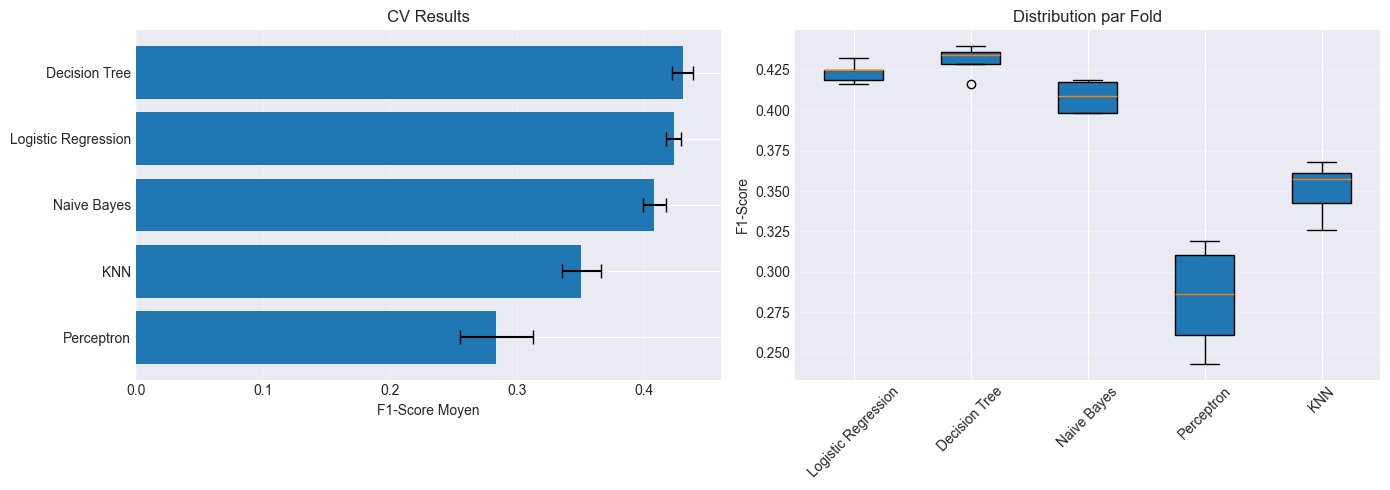

In [101]:
# visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barres avec écart type
data = cv_df.sort_values('F1 Moyen', ascending=True)
axes[0].barh(data['Modèle'], data['F1 Moyen'], xerr=data['Std'], capsize=5)
axes[0].set_xlabel('F1-Score Moyen')
axes[0].set_title('CV Results')
axes[0].grid(axis='x', alpha=0.3)

# Boxplot
scores_data = [cv_results[i]['Scores'] for i in range(len(cv_results))]
names = [cv_results[i]['Modèle'] for i in range(len(cv_results))]

axes[1].boxplot(scores_data, labels=names, patch_artist=True)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Distribution par Fold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

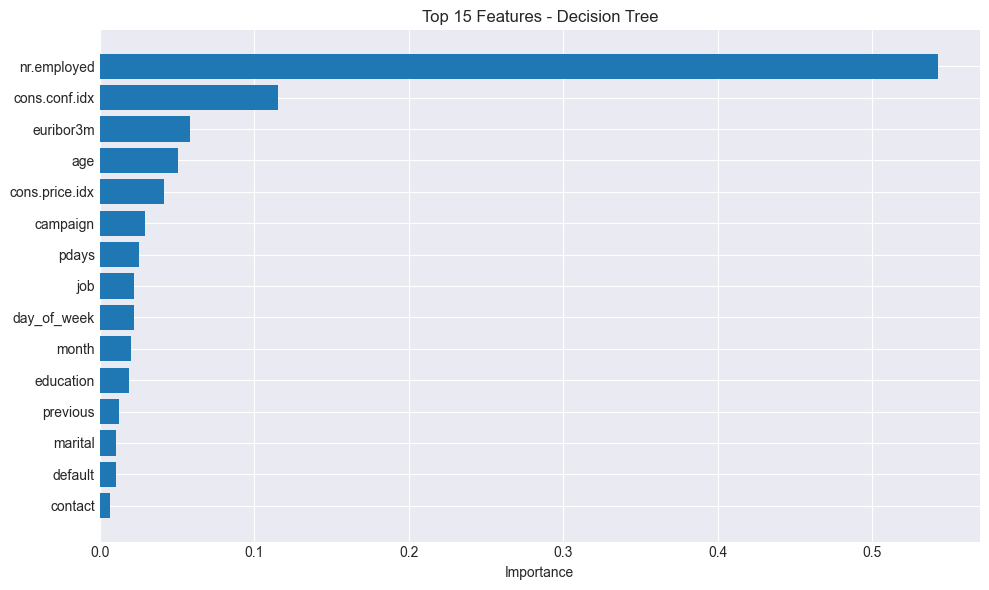

Features les plus importantes : ['nr.employed', 'cons.conf.idx', 'euribor3m', 'age', 'cons.price.idx']


In [102]:
# Importance des features avec Decision Tree
dt_model = trained_models['Decision Tree']
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance['Importance'].values)
plt.yticks(range(len(importance)), importance['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 Features - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Features les plus importantes :", importance['Feature'].head(5).tolist())

## 8. Conclusions

### Résultats

D'après ces analyses, le **Decision Tree** donne les meilleurs résultats avec un bon équilibre Precision/Recall et une bonne interprétabilité.

**Comparaison :**
- **Decision Tree** : Meilleures performence, facile à interpréter
- **Régression Logistique** : Bon modèle et assez rapide
- **KNN** : Correct mais lent
- **Naive Bayes** : Rapide mais hypothèse d'indépendance limitante
- **Perceptron** : Performances plus faibles

### Points importants

**Variables influentes :**
- Indicateurs économiques **(euribor3m, nr.employed)**
- Historique contacts **(pdays, poutcome)**

**Problèmes rencontrés :**
- Classes déséquilibrées (88% no / 11% yes)
- Valeurs "unknown" dans certaines variables
- Variable "duration" exclue 

### Améliorations possibles

Optimisation des hyperparamètres :
   - Decision Tree : tester différentes profondeurs
   - KNN : tester différentes valeurs de k 
   - Perceptron : ajuster le learning rate et le nombre d'itérations

Analyse temporelle : 
   - Modèles prenant en compte l'évolution dans le temps  

Feature engineering avancé  

Tester d'autres modèles plus performant 

## Conclusion Finale

Ce projet a démontré l'efficacité de plusieurs algorithmes de machine learning pour prédire le succès des campagnes de télémarketing bancaire. Le **Decision Tree** se distingue comme le meilleur choix, offrant un excellent compromis entre performances et stabilité.

La **Régression Logistique** constitue également une excellente alternative, avec l'avantage d'être très rapide et robuste, bien que légèrement moins performante.

Les modèles développés peuvent significativement améliorer l'efficacité des campagnes marketing en permettant un ciblage plus précis des clients potentiellement intéressés par les dépôts à terme bancaires.

